In [118]:
import pandas as pd
import numpy as np
df = pd.DataFrame(
    {
        'sex' : ['M', 'F', np.nan, 'M', 'F'],
        'score' : [5,4,3,4, np.nan]
    }
)
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [119]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [120]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [121]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [122]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [123]:
df_nomiss = df.dropna(subset=['score'])
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [124]:
df_nomiss = df.dropna(subset=['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [125]:
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [126]:
df['score'].mean()

4.0

In [127]:
df['score'].sum()

16.0

In [128]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [129]:
exam = pd.read_csv('exam.csv')
exam.loc[[2,7,14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [130]:
exam['math'].mean()

55.23529411764706

In [131]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [132]:
exam['math'].isna().sum()

0

In [133]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[[64,123,130,152,211], 'hwy'] = np.nan

In [134]:
mpg[['drv', 'hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

In [135]:
mpg.dropna(subset=['hwy']).groupby('drv').agg(hwy_mean = ('hwy', 'mean'))

,hwy_mean
drv,
4,19.242424
f,28.200000
r,21.000000


In [136]:
df = pd.DataFrame(
    {
        'sex' : [1,2,1,3,2,1],
        'score' : [5,4,3,4,2,6] 
    }
)
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [137]:
df['sex'].value_counts(sort=False).sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [138]:
df['score'].value_counts(sort=False).sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [139]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [140]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [141]:
df.dropna(subset=['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [142]:
df = pd.DataFrame(
    {
        'x1' : [1,1,2,2]
    }
)
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan) # nan 글자가 반환됨

In [143]:
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [144]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [145]:
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')

In [146]:
df['x2'] = df['x2'].replace('etc', np.nan)

In [147]:
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [148]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [149]:
df = pd.DataFrame(
    {
        'sex' : [1,2,1,3,2,1],
        'score' : [5,4,3,4,2,6]
    }
)

In [150]:
df['sex'].value_counts(sort = False).sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [151]:
df['score'].value_counts(sort = False).sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [152]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [153]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [154]:
df.dropna(subset=['sex','score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [155]:
df = pd.DataFrame({'x1' : [1,1,2,2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)

df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [156]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [157]:
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')

In [158]:
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [159]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


<Axes: ylabel='hwy'>

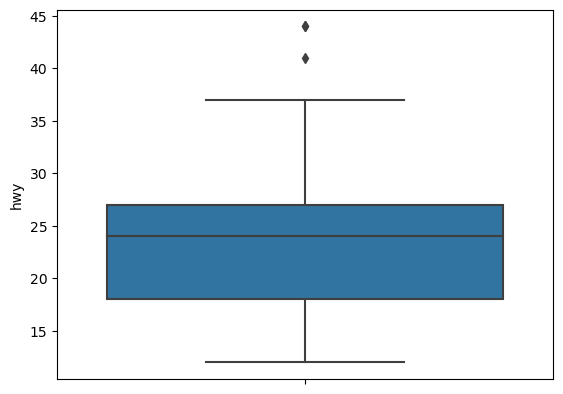

In [160]:
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [161]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [162]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [163]:
iqr = pct75 - pct25
iqr

9.0

In [164]:
pct25 - 1.5 * iqr

4.5

In [165]:
pct75 + 1.5 * iqr

40.5

In [166]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

mpg['hwy'].isna().sum()

3

In [167]:
mpg.dropna(subset= ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [168]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[[9,13,57,92], 'drv'] = 'k'
mpg.loc[[28,42,128,202], 'cty'] = [3,4,39,42]

In [169]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
k      4
r     24
Name: drv, dtype: int64

In [170]:
mpg['drv'] = np.where(mpg['drv'].isin(['4','f','r']), mpg['drv'], np.nan)

mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

<Axes: ylabel='cty'>

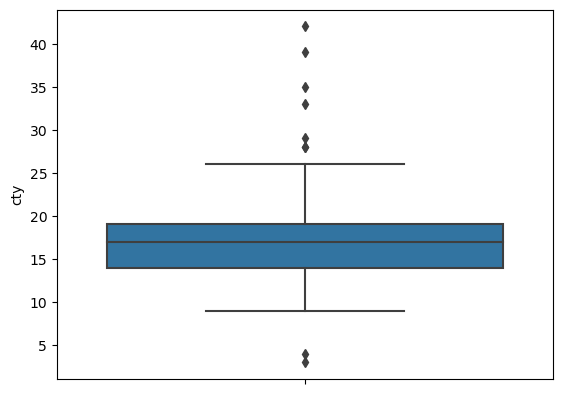

In [171]:
sns.boxplot(data = mpg, y = 'cty')

In [172]:
pct25 = mpg['cty'].quantile(.25)
pct75 = mpg['cty'].quantile(.75)
iqr = pct75 - pct25

In [173]:
pct25 - 1.5 * iqr

6.5

In [174]:
pct75 + 1.5 * iqr

26.5

In [178]:
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])

<Axes: ylabel='cty'>

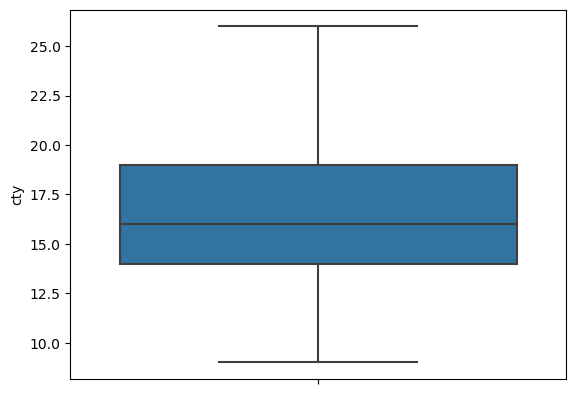

In [179]:
sns.boxplot(data = mpg, y = 'cty')

In [180]:
mpg.dropna(subset=['drv', 'cty']).groupby('drv').agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
